This program visualizes and applies transformations to MRI images using 3D Slicer and Simple ITK. 

Augustina Ashie: 20411977 

Date created: July 4, 2023; Last modified: July 7, 2023, 17:55

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

Part 1. Reading the 'BrainTumor_MRI.nii' file as an image object and printing its attributes. Two slices are visulaized and the distributions of their intensities are plotted in a histogram.

In [2]:
# This block reads in the image file.
reader = sitk.ImageFileReader()
reader.SetImageIO('NiftiImageIO')
reader.SetFileName(r'C:\Users\augustina\Documents\BMIF Program\Jupyter Notebook\Data\BrainTumor_MRI.nii')
img = reader.Execute()

In [3]:
# This block reads an image’s meta-data dictionary information
img_size = img.GetSize()
img_origin = img.GetOrigin()
img_space = img.GetSpacing()
img_direct = img.GetDirection()
img_pix_type = img.GetPixelIDTypeAsString()

In [4]:
# This block prints the image information.
def image_Info(img_size, img_origin, img_space, img_direct, img_pix_type):
    ''' This function relays information about the Nifti image file.
    :param img_size: Variable for the image size.
    :param: img_origin: Variable for the image origin vertex.
    :param: img_space: Variable for the spacing in the image. 
    :param img_direct: Variable for the direction of the image. 
    :param img_pix_type:Variable for the type of pixel. 
    :return: Prints the information for each variable.
    '''
    print('Size: ', img_size)
    print('Origin: ', img_origin)
    print('Spacing: ', img_space)
    print('Direction: ', img_direct)
    print('Pixel Type:', img_pix_type)

In [5]:
def main():
    '''This main function calls the image_Info function. 
    '''
    image_Info(img_size, img_origin, img_space, img_direct, img_pix_type)

In [6]:
main()

Size:  (256, 256, 112)
Origin:  (-119.53099822998047, -119.53099822998047, -77.69999694824219)
Spacing:  (0.9375, 0.9375, 1.399999976158142)
Direction:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type: 16-bit signed integer


In [7]:
# This block converts the image into an array and prints the array values.
mri_array = sitk.GetArrayFromImage(img)
print(mri_array)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


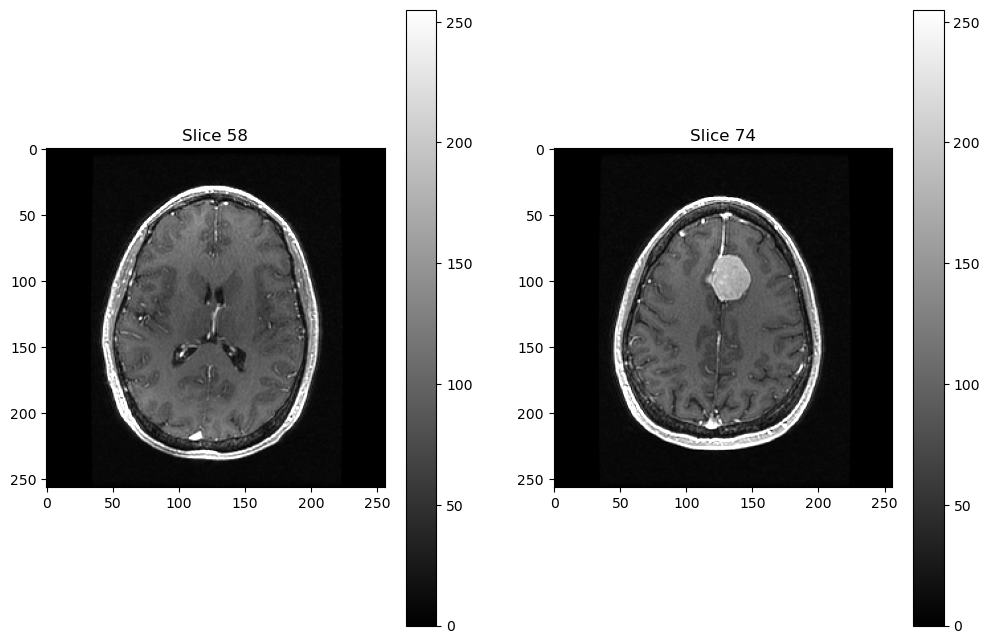

In [8]:
# This block visualizes slices 58 and 74 as subplots on a gray scale.
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax1, ax2 =  ax

img1 = ax[0].imshow(mri_array[58], cmap='gray', vmin=0, vmax= 255)
ax[0].set_title('Slice 58')

img2 = ax[1].imshow(mri_array[74], cmap='gray', vmin=0, vmax= 255)
ax[1].set_title('Slice 74')

fig.colorbar(img1, ax=ax1)
fig.colorbar(img2, ax=ax2)
plt.show()

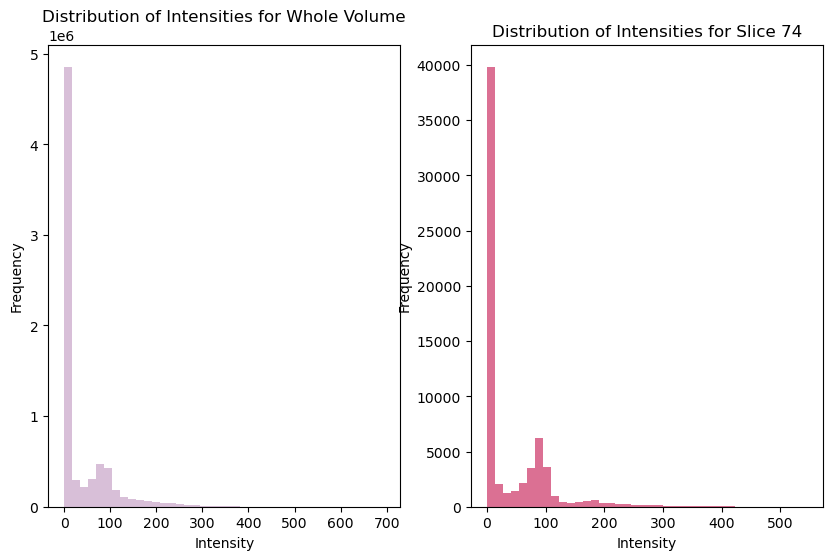

In [9]:
# This block displays histograms of the intensity distribution for the entire volume as well as for slice 74.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 6))

x = mri_array.flatten()
ax0.hist(x, bins=40, color='thistle')
ax0.set_title('Distribution of Intensities for Whole Volume')
ax0.set_xlabel('Intensity')
ax0.set_ylabel('Frequency')

x1 = (mri_array[74]).flatten()
ax1.hist(x1, bins=40, color='palevioletred')
ax1.set_title('Distribution of Intensities for Slice 74')
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Frequency')

plt.show()

Part 2. Obtaining the fiducial and the line measurements (horizontal extent) of the tumour in 4 different views.

In [10]:
# 3D Slicer screenshot of fiducial and the RAS location.

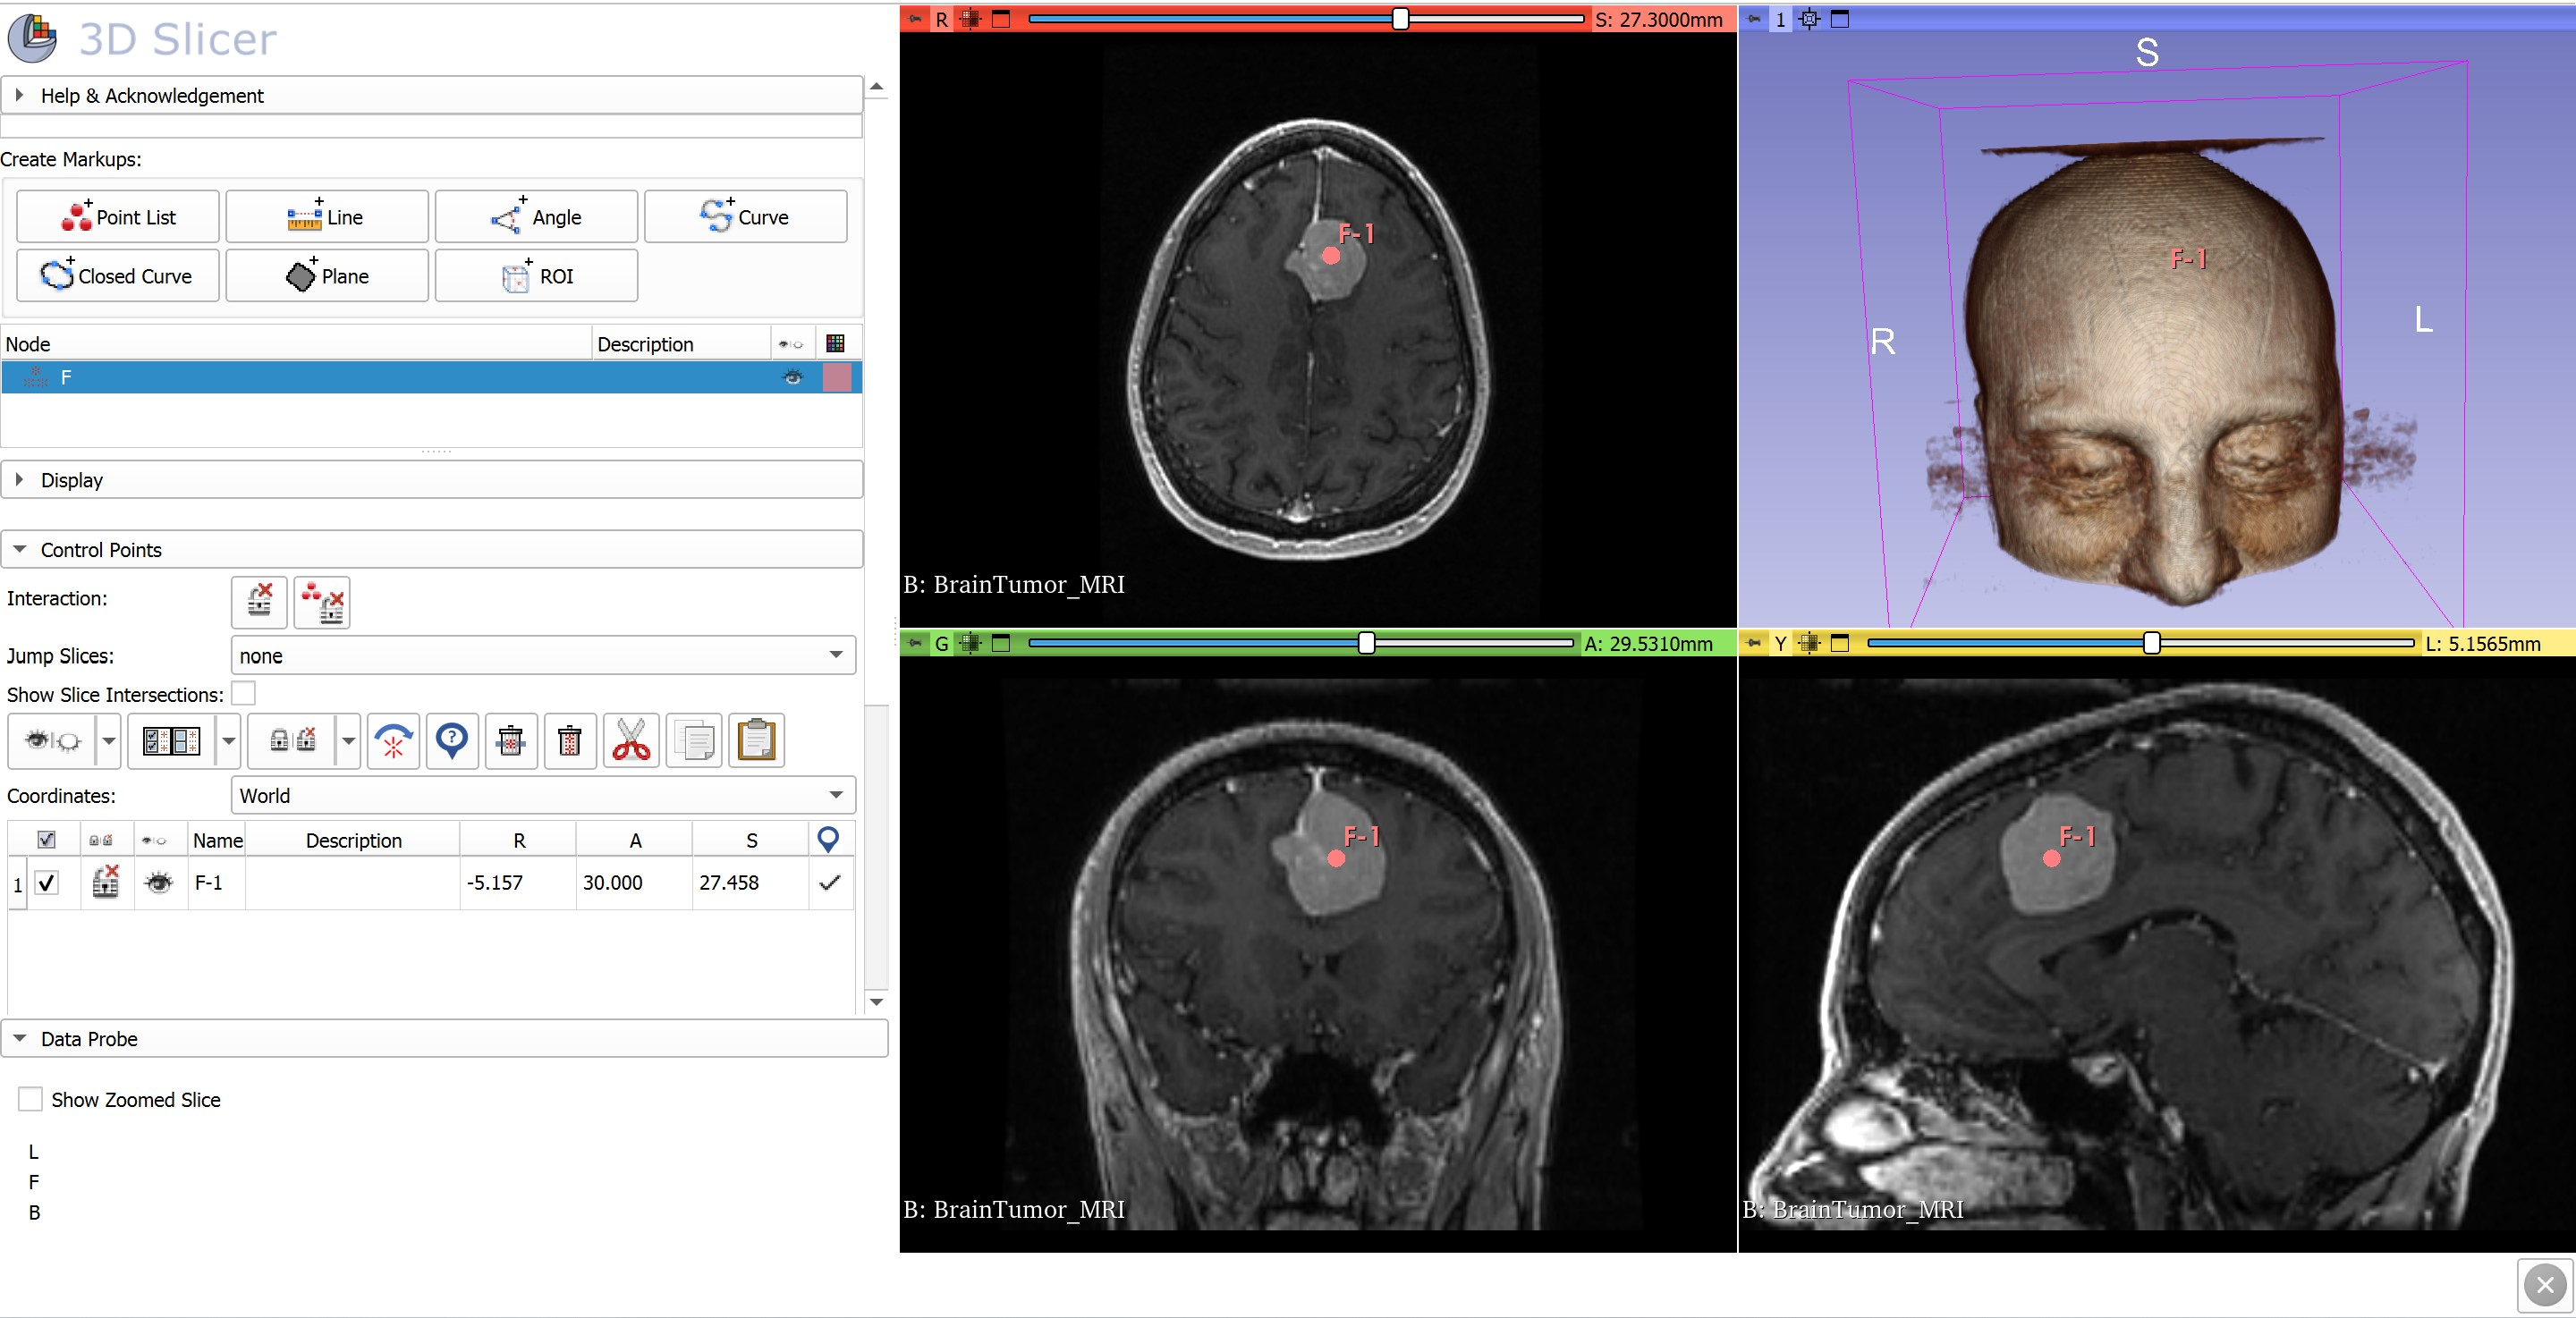

The reason why there is a negative number is because the RAS goes from right to left, whereas the LPS goes from left to right in direction. 
Since the direction of right to left (RAS) is going in the reverse (negative) direction, the value will be negative.
In the LPS, the values would be reversed, so where there are negatives in the RAS, there will be positives in the LPS since the direction becomes flipped.

For this case, the location of the LPS would be (5.157, -30.000, 27.458).

In [11]:
# 3D Slicer screenshot of the fiducial and the horizontal extent measurement ('Line').

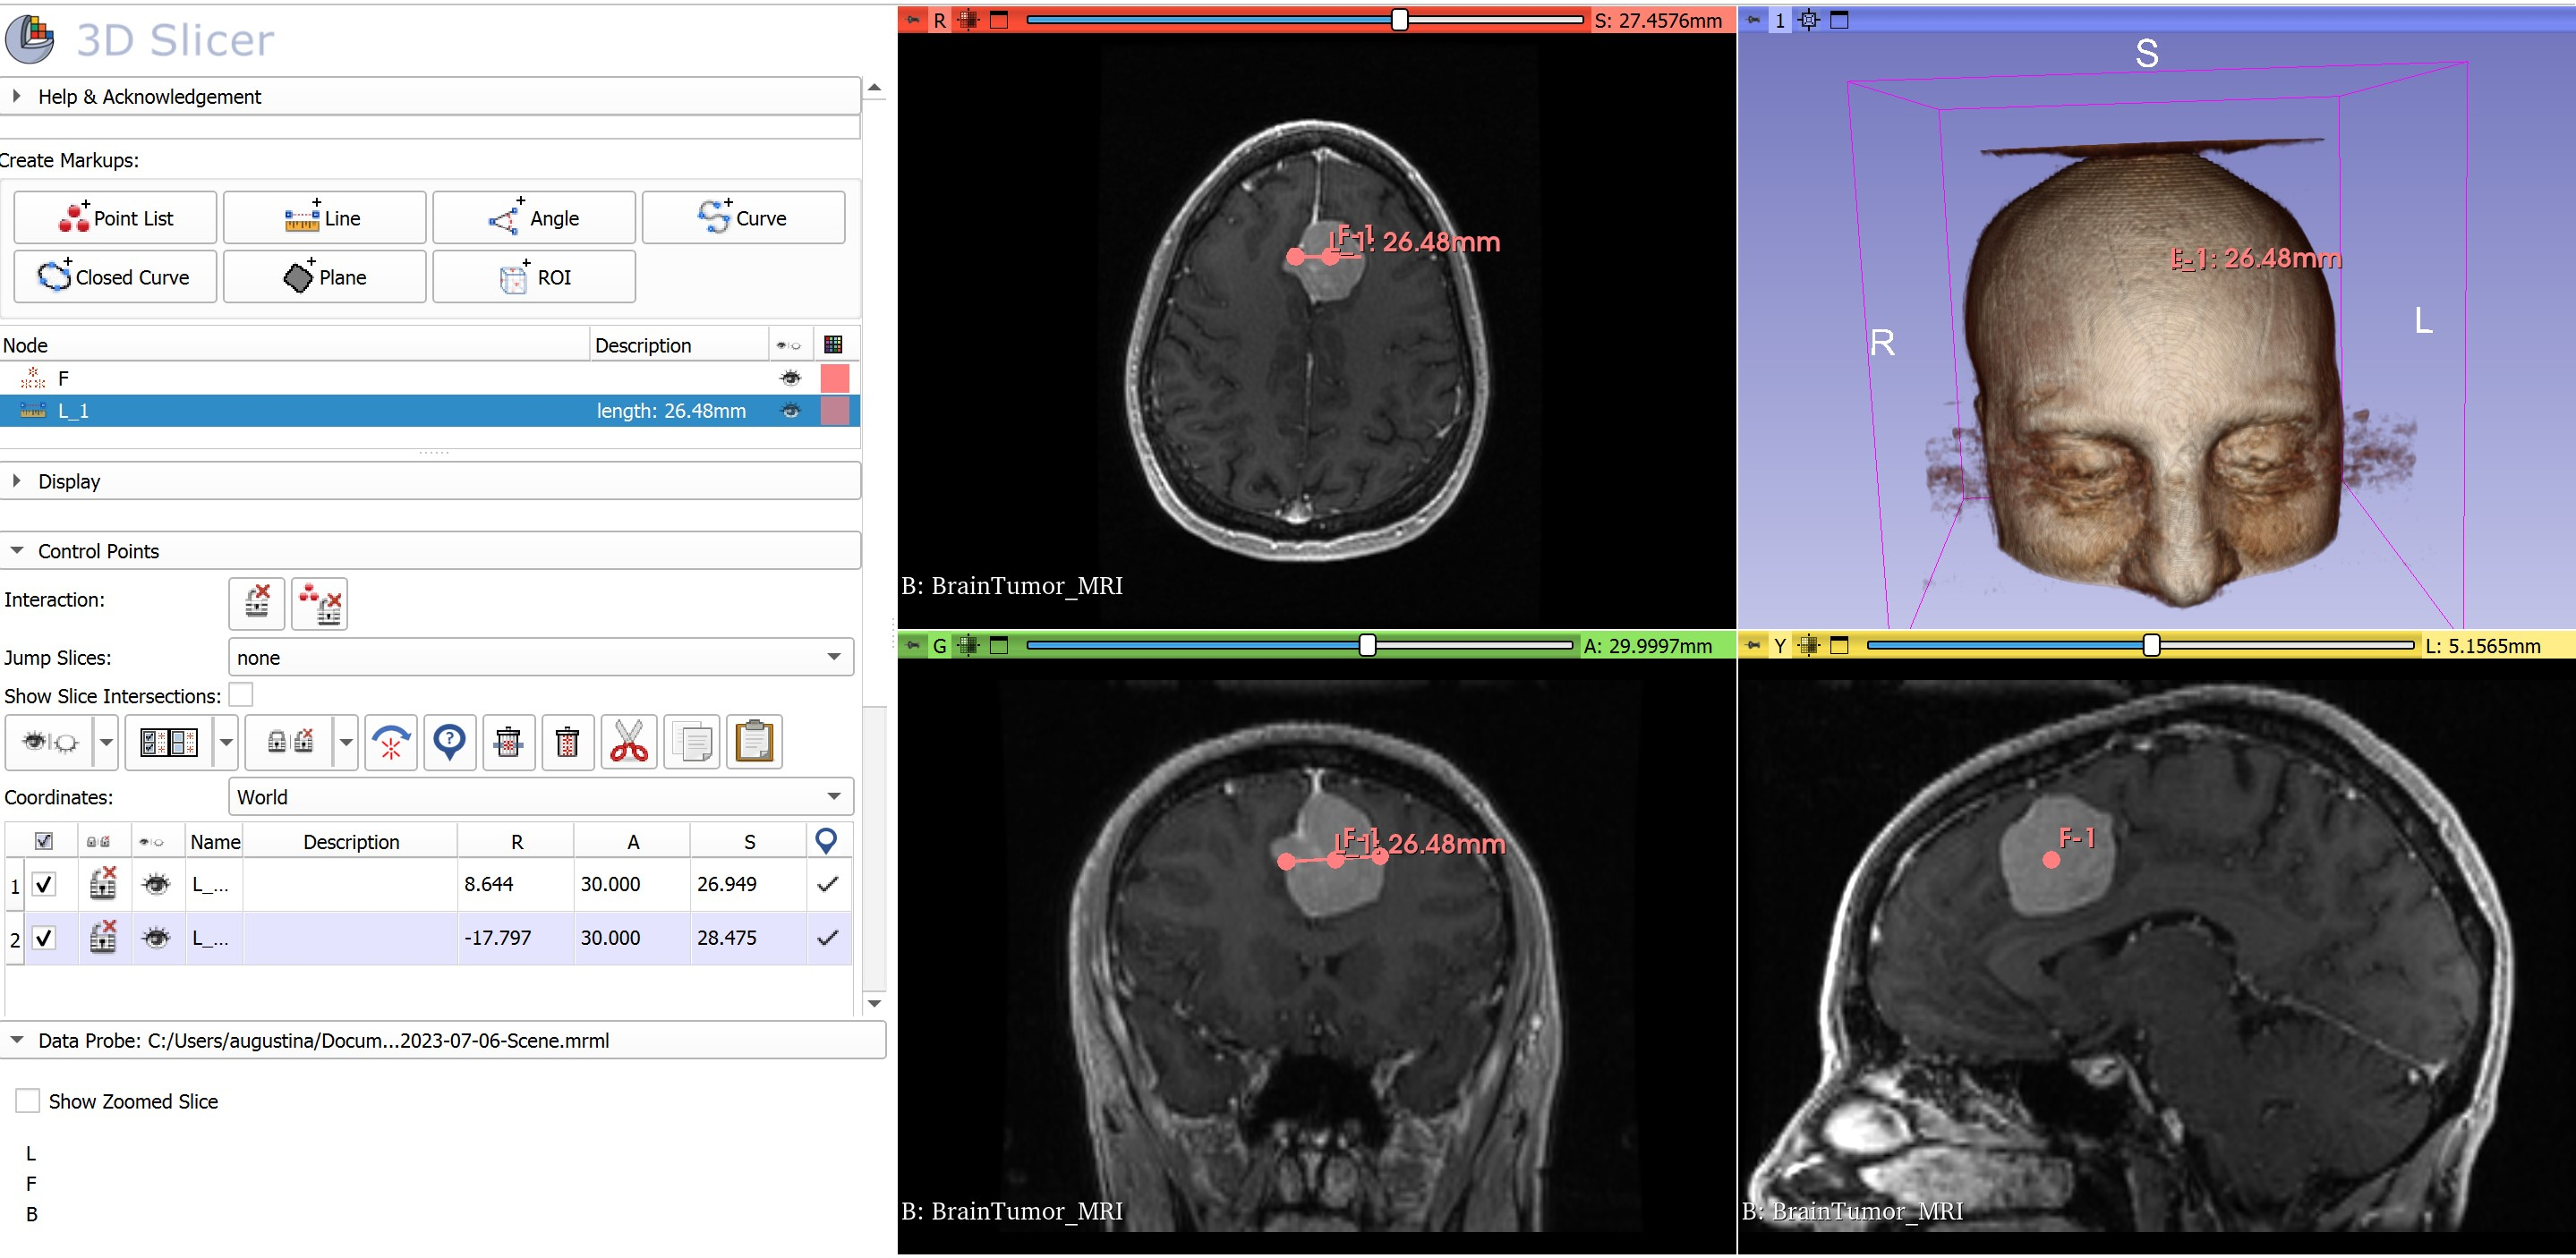

Part 3. Translation (spatial shift) of the centre of the tumor to the origin of the RAS coordinates in the MRI. Results of the 
original MRI versus the transformed MRI are plotted.

In [12]:
# Translation of the image.
RASpoint = [-5.157, 30.000, 27.458]

x= -5.157
y = 30.000
z = 27.458
LPSpoint = [-x, -y, z]

print(LPSpoint)

dimension = 3
offset = (LPSpoint)*dimension
translation = sitk.TranslationTransform(dimension, offset)
print(translation)

[5.157, -30.0, 27.458]
itk::simple::TranslationTransform
 TranslationTransform (000002389D522190)
   RTTI typeinfo:   class itk::TranslationTransform<double,3>
   Reference Count: 1
   Modified Time: 1887
   Debug: Off
   Object Name: 
   Observers: 
     none
   Offset: [5.157, -30, 27.458]



In [13]:
# Re-sampling of the translated image and conversion of resampling to an array.
reference_image = img

resample = sitk.Resample(reference_image, translation)
translated_array = sitk.GetArrayFromImage(resample)

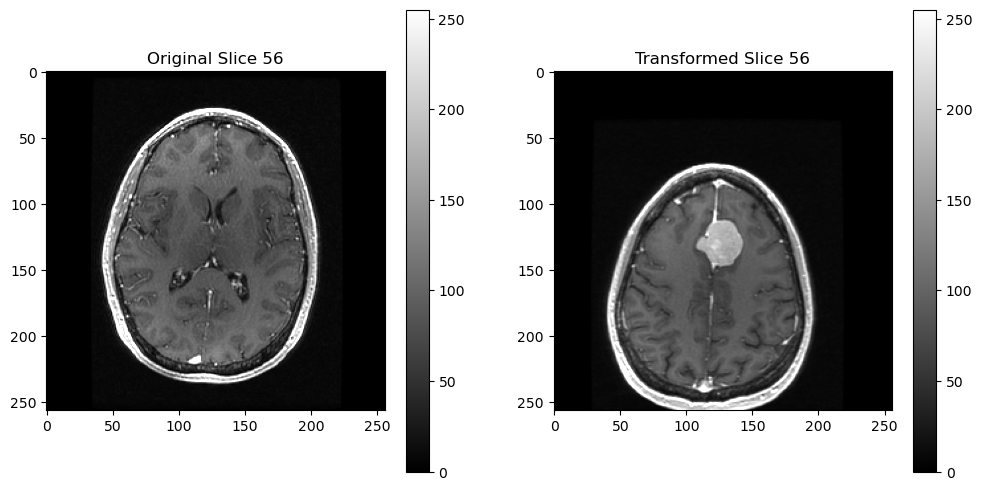

In [14]:
#  Plotting the translated results next to the original volume for axial slice 56.
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax1, ax2 =  ax

img1 = ax[0].imshow(mri_array[56], cmap='gray', vmin=0, vmax= 255)
ax[0].set_title('Original Slice 56')

img2 = ax[1].imshow(translated_array[56], cmap='gray', vmin=0, vmax= 255)
ax[1].set_title('Transformed Slice 56')

fig.colorbar(img1, ax=ax1)
fig.colorbar(img2, ax=ax2)
plt.show()